In [ ]:
# Mount with Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/MyDrive/Deep Learning/final project/dataset.zip" -d /content/

In [ ]:
import pandas as pd

df_init=pd.read_csv("creditcard.csv")

df_init.Class.value_counts().rename(index = {0:'Not Fraud', 1:'Fraud'})



Not Fraud    284315
Fraud           492
Name: Class, dtype: int64

In [ ]:
df_init

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Q2: Please preprocess the dataset for the analysis?

Preprocessing

In [ ]:
#------------preprocessing--------------

from sklearn.preprocessing import StandardScaler

#Scale Time and Amount as other features:
df_init['Time'] = StandardScaler().fit_transform(df_init['Time'].values.reshape(-1, 1))
df_init['Amount'] = StandardScaler().fit_transform(df_init['Amount'].values.reshape(-1, 1))

#Split the dataset:
x = df_init.drop(['Class'], axis = 1)
y = df_init['Class']

#Normalize the data to 0-1:
for col in x.columns: # Min-max scaling => (x - min(x)) / max(x) - min(x) n 
    x.loc[:,col]=(x.loc[:,col]-x.loc[:,col].min())/(x.loc[:,col].max()-x.loc[:,col].min())



Train-Validation-Test-Split + SMOKE

In [ ]:
#Train Test Split + SMOKE: oversample the minority case
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3, random_state=2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


#SMOTE

smt = SMOTE(random_state=2)
x_train_res, y_train_res = smt.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))




(199364, 30) (85443, 30) (199364,) (85443,)
After OverSampling, the shape of train_X: (398012, 30)
After OverSampling, the shape of train_y: (398012,) 

After OverSampling, counts of label '1': 199006
After OverSampling, counts of label '0': 199006


In [ ]:
!pip install keras_visualizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from keras_visualizer import visualizer



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
##我改到这里了！
model=Sequential()
model.add(Dense(128,input_shape=(x_train_res.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid")) 
visualizer(model,filename =  'graph01', format = 'png', view = True)


model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy']) #if regression: mterics should be error;
history = model.fit(x_train_res,y_train_res, validation_data=(x_test, y_test),
          batch_size= 80, epochs=30) #batch+-10,epochs +-50

Epoch 1/30
1358/4976 [=======>......................] - ETA: 11s - loss: 0.1010 - accuracy: 0.9114

KeyboardInterrupt: ignored

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

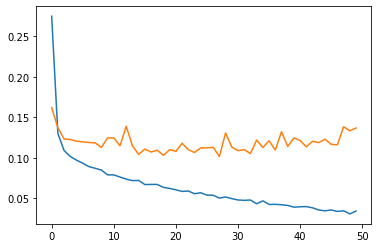

In [ ]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

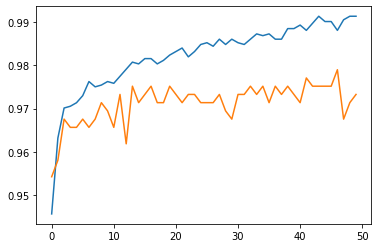

In [ ]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [ ]:
from keras.losses import binary_crossentropy

# real y
real = test.Class.astype("int").values
# predicted y
pred = model.predict(test.drop("Class",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))

17/17 [==============================] - 0s 2ms/step
0.1782560497522354


In [ ]:
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.9637404580152672


Comment: Please explain your model and why the results like this. 

Think about it: Is it underfitting or Overfitting? What are methods to improve results?

## Q4: How you can solve the problem and improve your model?

### Please add the Dropout on your model. 

In [ ]:
# Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2


model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid")) 


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) #if regression: mterics should be error;
history = model.fit(train.drop("Class",axis=1),train["Class"], #drop the output column
                    validation_data=(validation.drop("Class",axis=1),validation["Class"]),
          batch_size= 80, epochs=50) #batch+-10,epochs +-50

Epoch 1/50
31/31 [==============================] - 1s 10ms/step - loss: 0.2804 - accuracy: 0.9173 - val_loss: 0.1577 - val_accuracy: 0.9561
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.9583 - val_loss: 0.1366 - val_accuracy: 0.9599
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 0.1236 - accuracy: 0.9636 - val_loss: 0.1348 - val_accuracy: 0.9637
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 0.1107 - accuracy: 0.9677 - val_loss: 0.1224 - val_accuracy: 0.9656
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 0.1070 - accuracy: 0.9705 - val_loss: 0.1220 - val_accuracy: 0.9656
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.9714 - val_loss: 0.1149 - val_accuracy: 0.9695
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9730 - val_loss: 0.1204 - val_accuracy: 0.9714
Epoch 8/50
31/31 [=

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

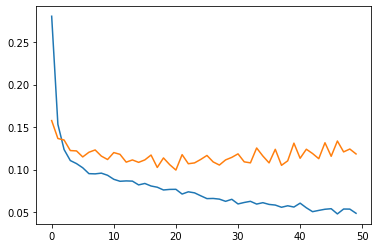

In [ ]:
# same as above, plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

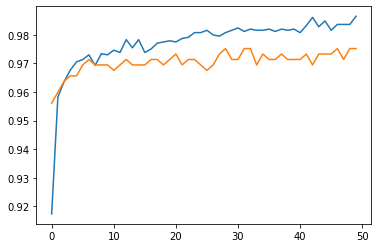

In [ ]:
# same as above, plot accuracy, val_accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [ ]:
# same as above, calculate  binary_crossentropy
from keras.losses import binary_crossentropy
real = test.Class.astype("int").values
pred = model.predict(test.drop("Class",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

17/17 [==============================] - 0s 1ms/step
0.16810005903244019


In [ ]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.9618320610687023


Comment: Please explain your model and why the results like this. 

### Please add L2 Weight Regularization

- Softmax, LR decay, optimizers, units, and layers

In [ ]:
# L2

model=Sequential()
# L2 regularization applied at the first hidden layer
model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu', kernel_regularizer="l2"))
model.add(Dense(32, activation='relu',kernel_regularizer="l2"))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid")) 


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) #if regression: mterics should be error;
history = model.fit(train.drop("Class",axis=1),train["Class"], #drop the output column
                    validation_data=(validation.drop("Class",axis=1),validation["Class"]),
          batch_size= 80, epochs=50) #batch+-10,epochs +-50


Epoch 1/50
31/31 [==============================] - 1s 10ms/step - loss: 1.0686 - accuracy: 0.9227 - val_loss: 0.8254 - val_accuracy: 0.9561
Epoch 2/50
31/31 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.9595 - val_loss: 0.5943 - val_accuracy: 0.9637
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.9652 - val_loss: 0.4427 - val_accuracy: 0.9599
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.9689 - val_loss: 0.3354 - val_accuracy: 0.9618
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.9677 - val_loss: 0.2687 - val_accuracy: 0.9637
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 0.2297 - accuracy: 0.9701 - val_loss: 0.2380 - val_accuracy: 0.9618
Epoch 7/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.9689 - val_loss: 0.2137 - val_accuracy: 0.9618
Epoch 8/50
31/31 [=

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

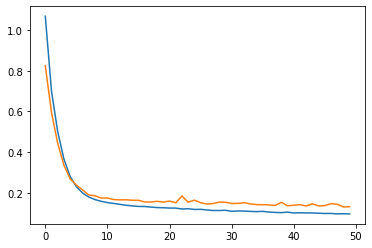

In [ ]:
# same as above, plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

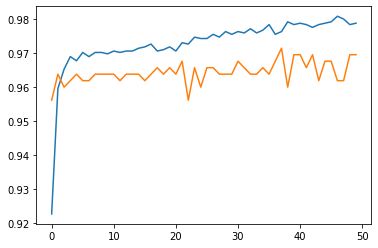

In [ ]:
# same as above, plot accuracy, val_accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [ ]:
# same as above, calculate  binary_crossentropy
from keras.losses import binary_crossentropy
real = test.Class.astype("int").values
pred = model.predict(test.drop("Class",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

17/17 [==============================] - 0s 2ms/step
0.11792739480733871


In [ ]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.9599236641221374


### Please use L2 + Dropout together

In [ ]:
# Dropout + L2

model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu', kernel_regularizer="l2"))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid")) 


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) #if regression: mterics should be error;
history = model.fit(train.drop("Class",axis=1),train["Class"], #drop the output column
                    validation_data=(validation.drop("Class",axis=1),validation["Class"]),
          batch_size= 80, epochs=50) #batch+-10,epochs +-50

Epoch 1/50
31/31 [==============================] - 2s 21ms/step - loss: 0.7307 - accuracy: 0.9038 - val_loss: 0.5181 - val_accuracy: 0.9542
Epoch 2/50
31/31 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.9529 - val_loss: 0.3811 - val_accuracy: 0.9580
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 0.3247 - accuracy: 0.9624 - val_loss: 0.2945 - val_accuracy: 0.9599
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 0.2515 - accuracy: 0.9673 - val_loss: 0.2545 - val_accuracy: 0.9599
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 0.2066 - accuracy: 0.9705 - val_loss: 0.2132 - val_accuracy: 0.9637
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9689 - val_loss: 0.1948 - val_accuracy: 0.9637
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.9709 - val_loss: 0.1698 - val_accuracy: 0.9656
Epoch 8/50
31/31 [=

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

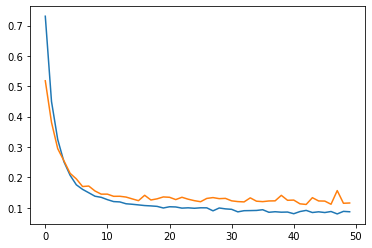

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

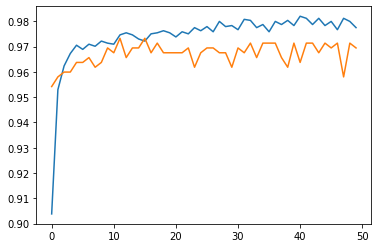

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [ ]:
from keras.losses import binary_crossentropy
real = test.Class.astype("int").values
pred = model.predict(test.drop("Class",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

17/17 [==============================] - 0s 1ms/step
0.13609637320041656


In [ ]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.9618320610687023
